In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import scipy.stats

%matplotlib inline

In [3]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
gapminder = pd.read_csv('gapminder.csv')

In [5]:
gdata = gapminder[gapminder.year==1985]

In [25]:
def sc(data):
    return 1e-6* data.population, data.region.map({'Africa':'skyblue', 'Europe':'gold',
                                                   'America':'palegreen', 'Asia':'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving', 'babies_per_woman',
                      c=colors, s=size, linewidth=0.5, edgecolor='k', alpha=0.5)

def plotfit(fit, data=gdata):
    plotdata(data)
    
    size, colors = sc(data)
    plt.scatter(data.age5_surviving, fit.predict(data),
               c=colors, s=30, linewidth=0.5, edgecolor='k', marker='D')
    
    

In [26]:
f_groupmeans = 'babies_per_woman ~ -1 + region'
f_surviving= 'babies_per_woman ~ -1 + region + age5_surviving'
f_srp = ('babies_per_woman ~ -1 + region + age5_surviving '
        '+ age5_surviving:region -age5_surviving - population')

In [27]:
shuffled = gdata.sample((len(gdata)))

In [28]:
training, testing = shuffled.iloc[:len(gdata)//2], shuffled.iloc[len(gdata)//2:]

In [29]:
surviving = smf.ols(f_surviving, data=training).fit()

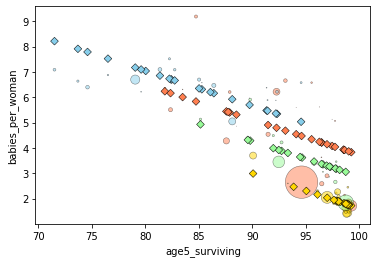

In [30]:
plotfit(surviving, training)

In [31]:
surviving.mse_resid

0.9289163220343412

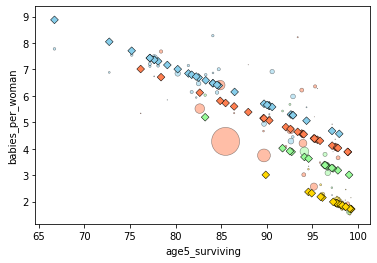

In [32]:
plotfit(surviving, testing)

In [34]:
resid = surviving.predict(testing) - testing.babies_per_woman
df = len(testing) - surviving.df_model - 1
np.sum(resid**2)/df

1.0279821200450763

In [41]:
def cross_validate(data, formual, response, n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        training, testing = shuffled.iloc[:len(data)//2], shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(f_surviving, data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2)/df
        
        ret.append(mse)
        
    return np.mean(ret)
        

In [42]:
cross_validate(gdata, f_groupmeans, 'babies_per_woman')

1.0507683892958088

In [45]:
cross_validate(gdata, f_surviving, 'babies_per_woman')

1.0522895763830193

In [46]:
cross_validate(gdata, f_srp, 'babies_per_woman')

1.0869783218338342